In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as plt
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.ensemble import RandomForestClassifier as RFC

sns.set(rc={"figure.figsize": (12.,6.)})

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

from sklearn.linear_model import SGDRegressor as SGDR
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR #recomendado paper
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from sklearn.ensemble import RandomForestRegressor as RFR

In [2]:
data=pd.read_csv('data_clean.csv')
data.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   AC             388 non-null    int64  
 6   rain           388 non-null    int64  
 7   sun            388 non-null    int64  
 8   gas_type_E10   388 non-null    int64  
 9   gas_type_SP98  388 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 30.4 KB


In [4]:
#calculamos los litros consumidos de gasolina totales

In [5]:
data['liters']=data['consume']*data['distance']

In [6]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98,liters
0,28.0,5.0,26,21.5,12,0,0,0,1,0,140.00
1,12.0,4.2,30,21.5,13,0,0,0,1,0,50.40
2,11.2,5.5,38,21.5,15,0,0,0,1,0,61.60
3,12.9,3.9,36,21.5,14,0,0,0,1,0,50.31
4,18.5,4.5,46,21.5,15,0,0,0,1,0,83.25


## CONSUME PREDICTION

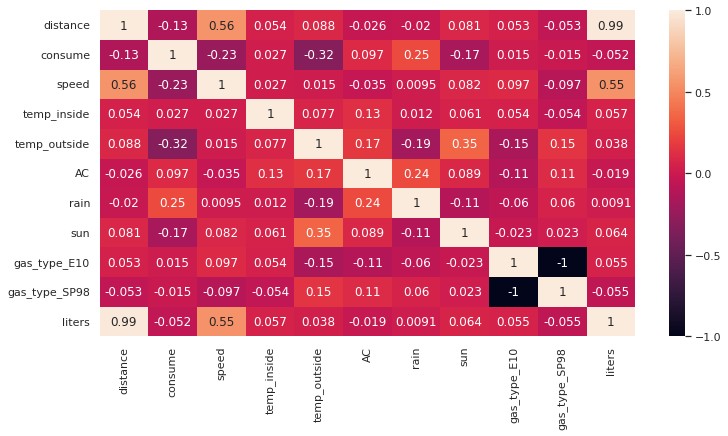

In [7]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix,annot=True)
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_context("poster")
sns.set_style("whitegrid")
plt.show();

In [8]:
#we drop distance, its explained by liters

In [9]:
data=data.drop(columns=['distance'])

In [10]:
data.head()

,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_E10,gas_type_SP98,liters
0,5.0,26,21.5,12,0,0,0,1,0,140.00
1,4.2,30,21.5,13,0,0,0,1,0,50.40
2,5.5,38,21.5,15,0,0,0,1,0,61.60
3,3.9,36,21.5,14,0,0,0,1,0,50.31
4,4.5,46,21.5,15,0,0,0,1,0,83.25


In [11]:
data.shape

(388, 10)

In [12]:
X=data.drop('consume', axis=1)
y=data.consume

In [13]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [14]:
def prueba_modelo(modelo):
    
    modelo.fit(X_train, y_train)
    y_pred=modelo.predict(X_test)
    modelo.fit(X,y)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
      
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    print('rsme:', mean_sq)
    print('\n')
   
    return modelo

In [15]:
modelos=[LinReg(), Lasso(), ElasticNet(), SVR(),Ridge(),SGDR(max_iter=500),KNNR(n_neighbors=5, weights='distance'),
        GBR(n_estimators=50, learning_rate=0.2),XGBR(),CTR(verbose=0),RFR(n_estimators=100),LGBMR()]

In [16]:
for m in modelos:
    prueba_modelo(m)

LinearRegression()
Train R2: 0.21958917441782821
Test R2: 0.1747148332649764
rsme: 0.8799995610562888


Lasso()
Train R2: 0.1351834460461171
Test R2: 0.13100240730963864
rsme: 0.8922041853227084


ElasticNet()
Train R2: 0.1560498141848522
Test R2: 0.14998950498285213
rsme: 0.884122032871682


SVR()
Train R2: 0.1602126791325611
Test R2: 0.15653654383294613
rsme: 0.8866497423052465


Ridge()
Train R2: 0.21935269562509518
Test R2: 0.17571584453945388
rsme: 0.8788555875737863


SGDRegressor(max_iter=500)
Train R2: -2.5114559334047707e+25
Test R2: -2.9556539656525324e+25
rsme: 16246078938155.963


KNeighborsRegressor(weights='distance')
Train R2: 1.0
Test R2: 1.0
rsme: 0.6779849853780486


GradientBoostingRegressor(learning_rate=0.2, n_estimators=50)
Train R2: 0.8990136239894457
Test R2: 0.8788390731116169
rsme: 0.6631404844875791


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             

In [17]:
#segun los modelos, el mejor es el catboost, que tiene mayor R2 en train/ test (riesgo de overfiting) y menor rmse
# despúes estarían tanto el RFR() y el LGBMR()

In [18]:
def regre(modelo):
    
    modelo.fit(X_train, y_train)
    y_pred=modelo.predict(X_test)
    modelo.fit(X,y)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
      
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    print('rsme:', mean_sq)
    print('\n')
   
    return modelo

In [19]:
ctr=CTR(verbose=0) 
ctr=regre(ctr)

Train R2: 0.9680191001747606
Test R2: 0.9523145007802247
rsme: 0.6472285903044763




In [20]:
    modelo=CTR(verbose=0)
    modelo.fit(X_train, y_train)
    y_pred=modelo.predict(X_test)
    modelo.fit(X,y)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
    print('y_pred',y_pred)

y_pred [4.95723144 5.04019002 5.30596087 4.60794825 4.32959078 5.29636119
 5.38261485 4.83653499 5.67328587 4.45071296 3.91191404 4.34208777
 5.75688384 5.53007022 6.03405955 5.00764745 5.45598634 5.00408952
 4.93690025 4.50781359 4.56199966 5.43537004 5.11269362 4.88298053
 5.07010668 4.97900388 5.0083693  3.98228097 4.47391941 4.43398464
 5.03159284 5.11379281 4.50216604 4.09771371 5.68918179 5.16788632
 4.34361441 4.64803415 4.77873464 5.69655095 5.09184358 4.6971658
 4.33292851 4.84070495 5.2773858  4.49746343 6.40247039 4.10425023
 4.44449913 4.92140522 4.40479537 5.43538189 5.48022261 4.72456072
 5.35947138 4.33971694 6.09632299 5.03596005 4.75890757 4.13152589
 7.41711822 4.05988057 4.44040153 4.68804658 4.05307387 4.18410981
 7.97066155 4.14712316 4.08977837 5.45113076 4.30434442 4.70200129
 5.13953419 4.20933809 4.75979141 4.45462143 4.78314413 4.84578756]
